In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as transforms
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
import warnings
warnings.filterwarnings("ignore")

# data visualization course on Kaggle learn, pandas plotting

In [3]:
f = '/home/szong/projects/development/notebooks/winemag-data_first150k.csv'
reviews = pd.read_csv(f, index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


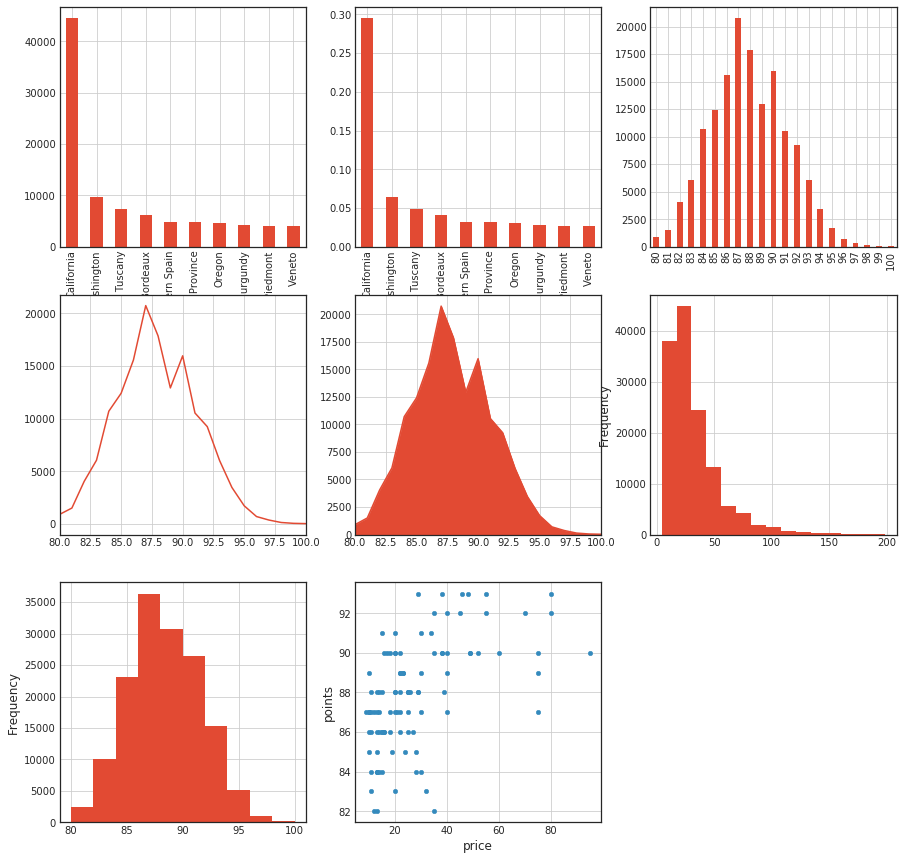

In [9]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(15,15))
    ax1 = fig.add_subplot(331)
    reviews['province'].value_counts().head(10).plot.bar()
    ax2 = fig.add_subplot(332)
    (reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()
    ax3 = fig.add_subplot(333)
    reviews['points'].value_counts().sort_index().plot.bar()
    ax4 = fig.add_subplot(334)
    reviews['points'].value_counts().sort_index().plot.line()
    ax5 = fig.add_subplot(335)
    reviews['points'].value_counts().sort_index().plot.area()
    ax6 = fig.add_subplot(336)
    reviews[reviews['price'] < 200]['price'].plot.hist(bins=15)
    ax7 = fig.add_subplot(337)
    reviews['points'].plot.hist()
    ax8 = fig.add_subplot(338)
    reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points', ax=ax8)



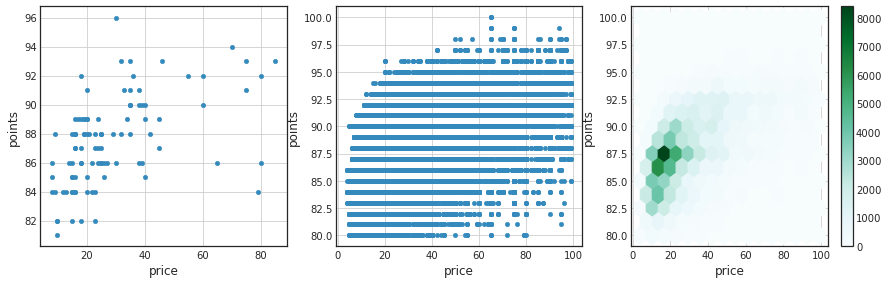

In [14]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(15,15))
    ax1 = fig.add_subplot(331)
    reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points', ax=ax1)
    ax2 = fig.add_subplot(332)
    reviews[reviews['price'] < 100].plot.scatter(x='price', y='points', ax=ax2)
#     deal with scatter points overlapping, 1. downsampling, 2. use hexplot
    ax3 = fig.add_subplot(333)
    reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15, ax=ax3)
    




In [15]:
f = '/home/szong/projects/development/notebooks/top-five-wine-score-counts.csv'
wine_counts = pd.read_csv(f,index_col=0)
wine_counts.head(2)

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0


In [26]:
wine_counts

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0
85,310.0,1048.0,1244.0,873.0,587.0
86,354.0,1194.0,1472.0,1218.0,871.0
87,510.0,1566.0,1809.0,1726.0,1233.0
88,498.0,1141.0,1416.0,1474.0,1260.0


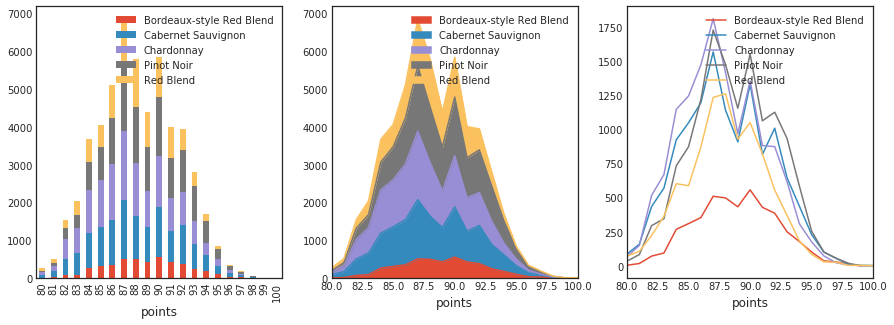

In [25]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(15,5))
    ax1 = fig.add_subplot(131)
    wine_counts.plot.bar(stacked=True, ax=ax1)
    ax2 = fig.add_subplot(132)
    wine_counts.plot.area(ax=ax2)
    ax3 = fig.add_subplot(133)
    wine_counts.plot.line(ax=ax3)
    

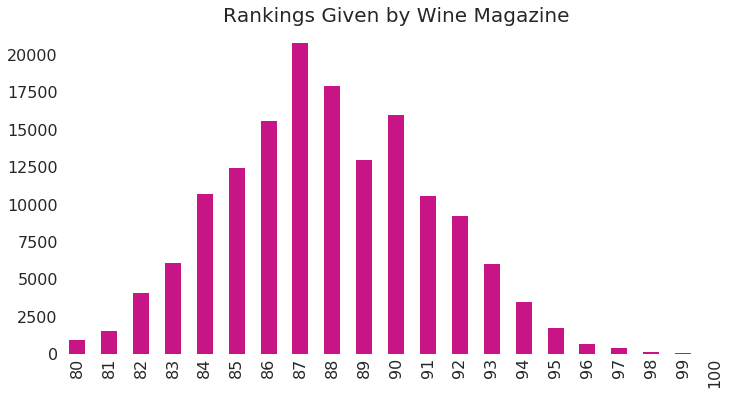

In [29]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    ax = reviews['points'].value_counts().sort_index().plot.bar(
        figsize=(12, 6),
        color='mediumvioletred',
        fontsize=16
    )
    ax.set_title("Rankings Given by Wine Magazine", fontsize=20)
    sns.despine(bottom=True, left=True)

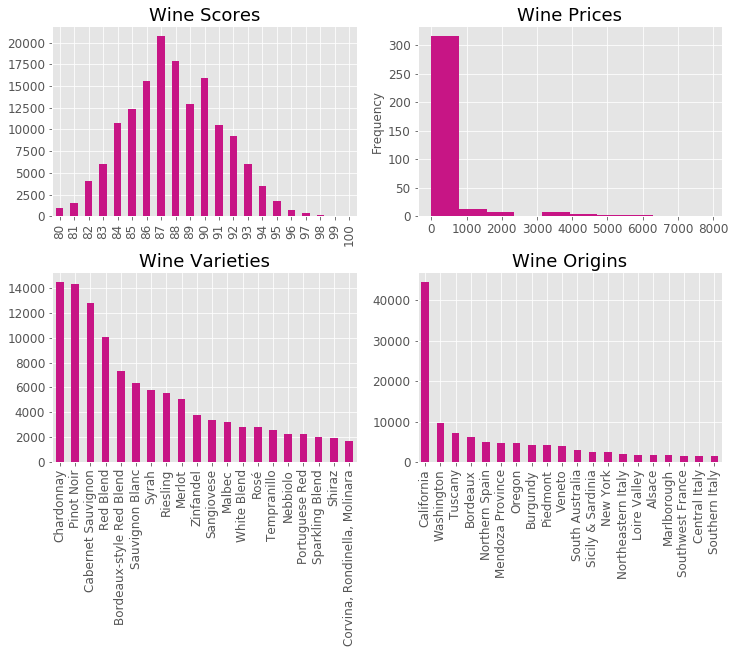

In [30]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine()

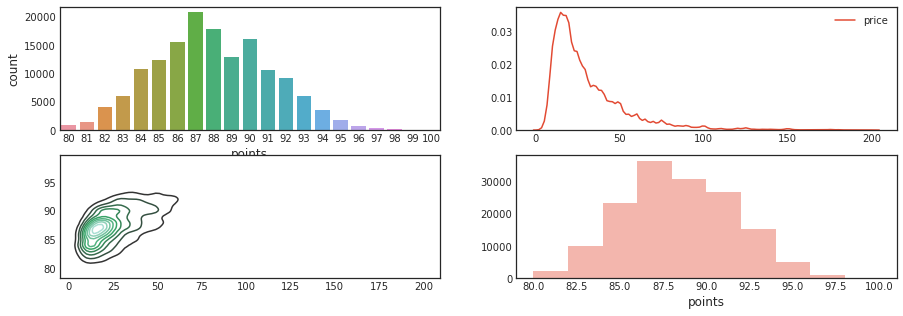

In [44]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(15,5))
    ax1 = fig.add_subplot(221)
    sns.countplot(reviews['points'])
    ax2 = fig.add_subplot(222)
    sns.kdeplot(reviews.query('price < 200').price)
    ax3 = fig.add_subplot(223)
    sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))
    ax4 = fig.add_subplot(224)
    sns.distplot(reviews['points'], bins=10, kde=False)

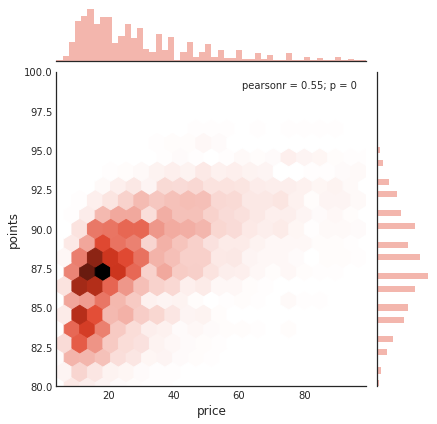

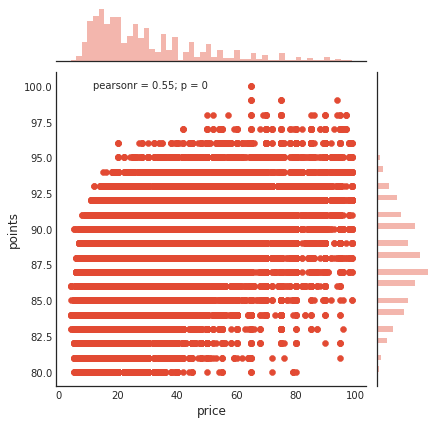

In [46]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(15,5))
#     ax1 = fig.add_subplot(121)/
    
    sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)
    sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

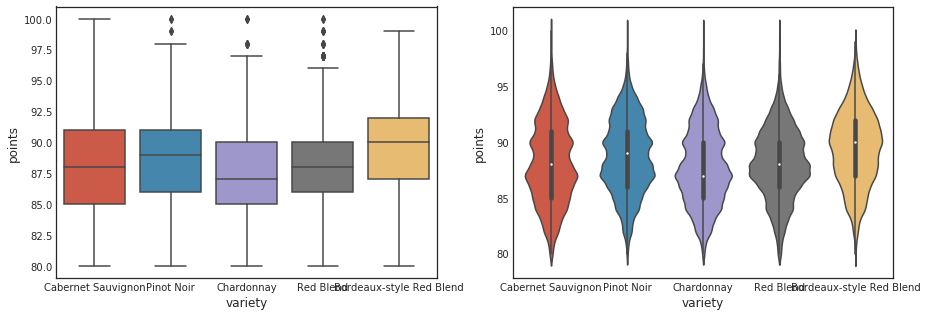

In [49]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(15,5))
    df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
    ax1 = fig.add_subplot(121)
    sns.boxplot(
        x='variety',
        y='points',
        data=df)
    ax2 = fig.add_subplot(122)
    sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
    )

In [52]:
f = '/home/szong/projects/development/notebooks/CompleteDataset.csv'
pd.set_option('max_columns', None)
df = pd.read_csv(f, index_col=0)



footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])
footballers.head(2)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW


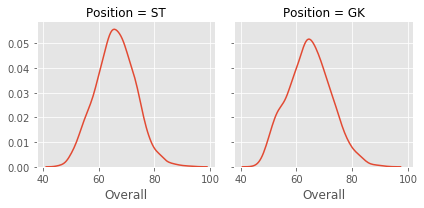

In [53]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col="Position")
g.map(sns.kdeplot, "Overall")

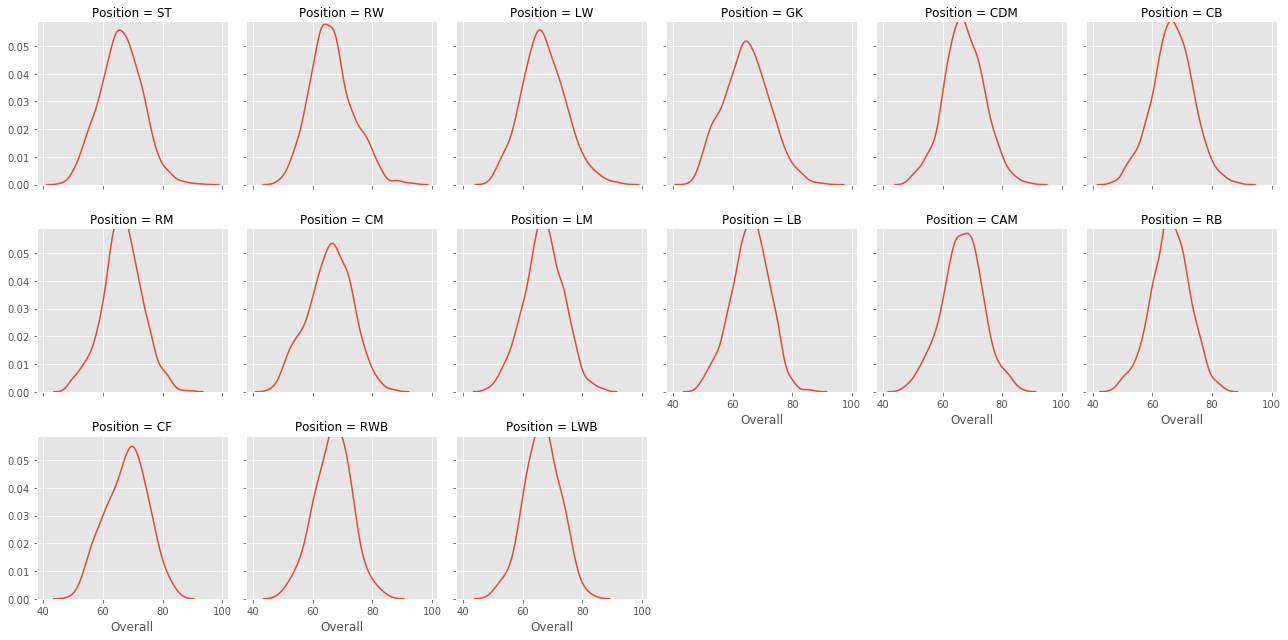

In [57]:
df = footballers
g = sns.FacetGrid(df, col="Position", col_wrap=6)
g.map(sns.kdeplot, "Overall")

In [59]:
df

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
20,J. Oblak,24,https://cdn.sofifa.org/48/18/players/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,93,Atlético Madrid,https://cdn.sofifa.org/24/18/teams/240.png,57.0,€82K,1290,43,34,67,49,16,55,13,13,12,11,14,84,90,77,87,84,15,19,76,26,12,14,11,11,84,29,22,18,60,41,12,78,55,13,NaN,NaN,NaN,NaN,NaN,200389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,57.0,GK
64,K. Benzema,29,https://cdn.sofifa.org/48/18/players/165153.png,France,https://cdn.sofifa.org/flags/18.png,86,86,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,44.5,€295K,1950,77,65,77,60,86,82,75,79,82,87,73,13,11,5,5,7,78,22,70,47,77,13,82,87,83,86,83,12,78,73,15,78,85,79,82.0,44.0,52.0,84.0,72.0,165153,82.0,51.0,44.0,72.0,52.0,84.0,80.0,83.0,83.0,56.0,ST,82.0,51.0,44.0,72.0,52.0,84.0,80.0,83.0,83.0,56.0,83.0,M,44.5,ST
74,K. Navas,30,https://cdn.sofifa.org/48/18/players/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,85,85,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,24.5,€165K,1301,54,32,60,61,19,49,11,11,16,15,15,87,82,72,80,85,11,20,74,37,13,12,25,16,82,30,21,14,53,39,14,75,54,11,NaN,NaN,NaN,NaN,NaN,193041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,24.5,GK
78,M. ter Stegen,25,https://cdn.sofifa.org/48/18/players/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,85,89,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,35.5,€155K,1274,38,43,37,43,18,62,15,18,17,14,12,84,83,87,81,86,11,22,79,38,10,10,25,11,82,30,22,10,50,35,13,79,57,14,NaN,NaN,NaN,NaN,NaN,192448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,35.5,GK
178,K. Gameiro,30,https://cdn.sofifa.org/48/18/players/176600.png,France,https://cdn.sofifa.org/flags/18.png,83,83,Atlético Madrid,https://cdn.sofifa.org/24/18/teams/240.png,25.0,€73K,2040,88,66,82,77,80,85,70,76,76,86,70,6,10,8,8,6,67,38,84,72,76,23,85,86,85,79,84,39,86,76,33,64,76,78,80.0,51.0,59.0,81.0,74.0,176600,80.0,59.0,51.0,74.0,59.0,81.0,80.0,81.0,80.0,62.0,ST,80.0,59.0,51.0,74.0,59.0,81.0,80.0,81.0,80.0,62.0,81.0,M,25.0,ST
327,J. Cillessen,28,https://cdn.sofifa.org/48/18/players/199987.png,Netherlands,https://cdn.sofifa.org/flags/34.png,81,83,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,15.0,€125K,1287,54,25,48,50,32,56,17,10,12,10,10,79,83,74,81,77,12,25,71,33,15,18,21,11,78,47,35,11,50,40,12,67,60,19,NaN,NaN,NaN,NaN,NaN,199987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,Na

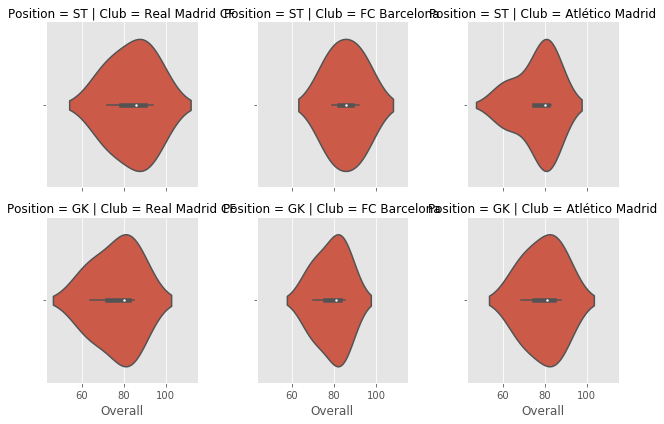

In [58]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row="Position", col="Club")
g.map(sns.violinplot, "Overall")

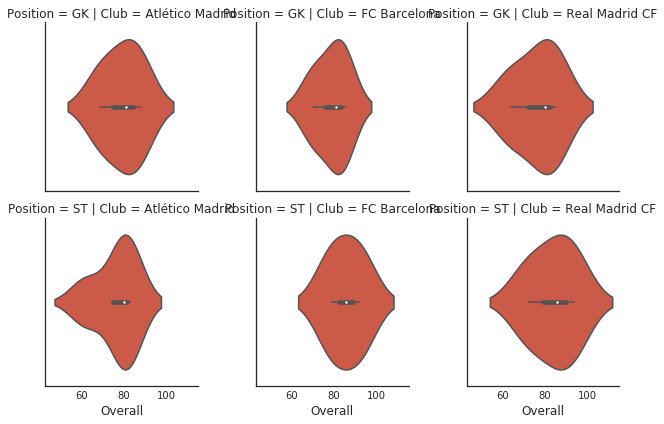

In [81]:
with plt.style.context("seaborn-white"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='white', figsize=(12,6))
    df = footballers[footballers['Position'].isin(['ST', 'GK'])]
    df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

    g = sns.FacetGrid(df, row="Position", col="Club", 
                      row_order=['GK', 'ST'],
                      col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
    g.map(sns.violinplot, "Overall")
   

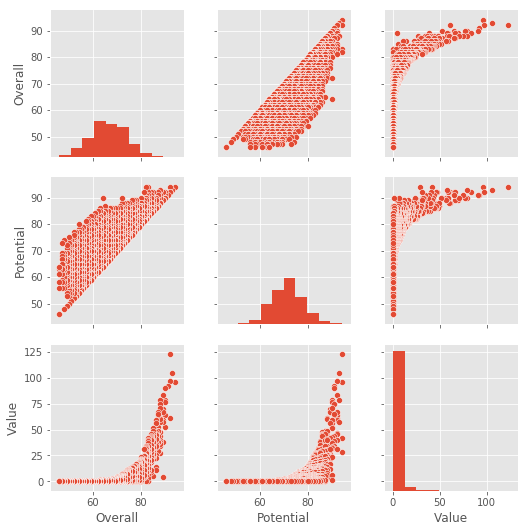

In [82]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

In [85]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


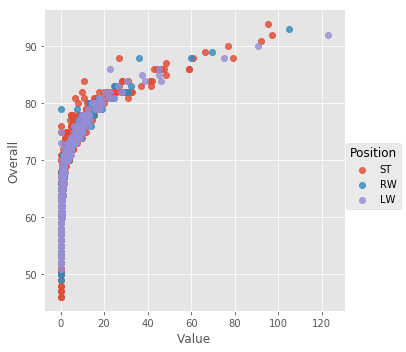

In [83]:
sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

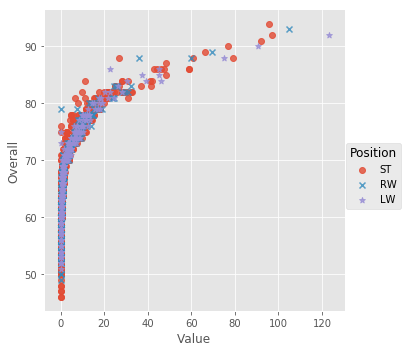

In [86]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position',
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

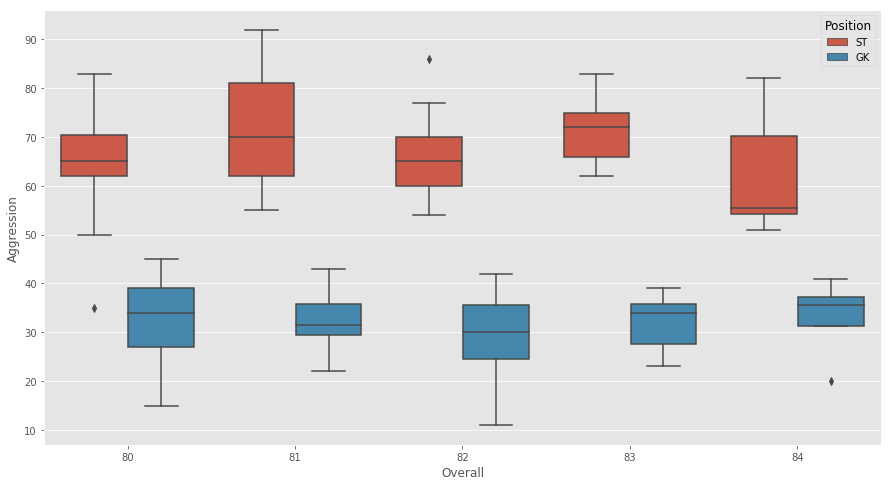

In [87]:
f = (footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)

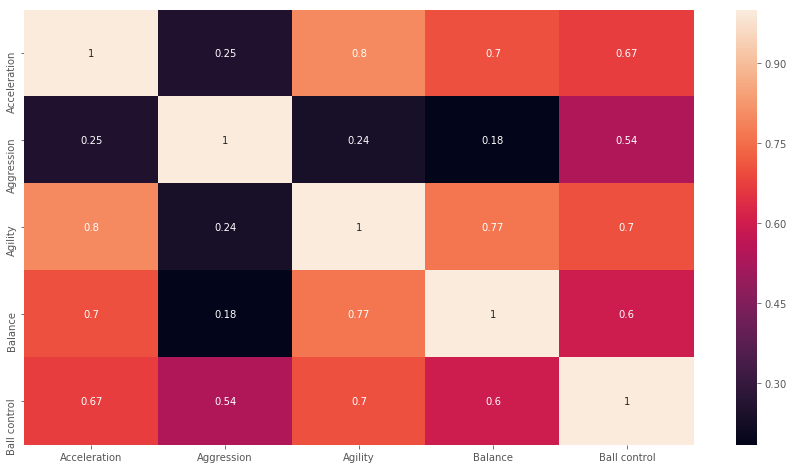

In [91]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)

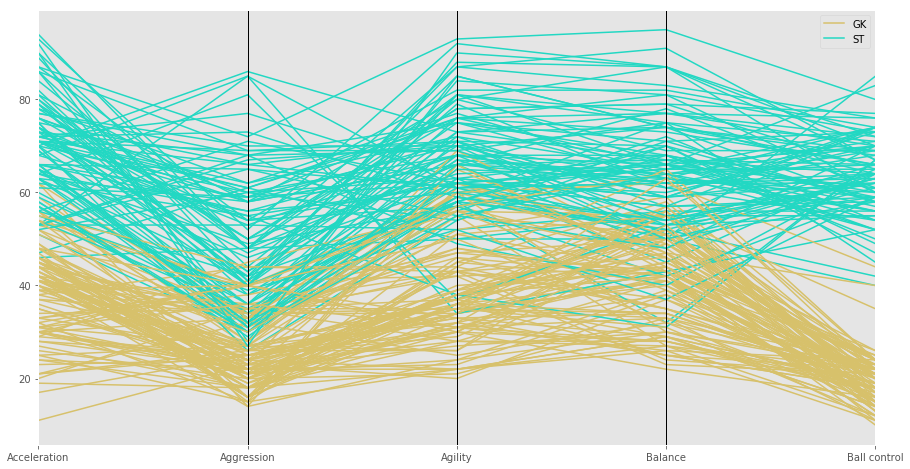

In [92]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17]
        .loc[footballers['Position'].isin(['ST', 'GK'])]
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
        .dropna()
)
f['Position'] = footballers['Position']
f = f.sample(200)

parallel_coordinates(f, 'Position')